In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

def my_plt(x, y, a, w):
    plt.scatter(x, y)
    plt.plot(x, a + w*x)

def grd_dsc(x, y, w, alpha=1e-4, itr=1000):
    for i in range(itr):
        y_pred = np.dot(w, x)
        err = calc_mse(y, y_pred)
        for j in range(w.shape[0]):
            w[j] -= alpha * (1/x.shape[0] * 2 * np.sum(x[j] * (y_pred - y)))
        if i % 100 == 0:
            print(i, W, err)

In [0]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [0]:
grd_dsc(X, y, np.array([1, 0.5]))

0 [47.23214286  3.91071429] 3173.15
100 [47.23214286  3.91071429] 1087.8417937440565
200 [47.23214286  3.91071429] 899.8636338410433
300 [47.23214286  3.91071429] 811.4405276922265
400 [47.23214286  3.91071429] 735.6296795508777
500 [47.23214286  3.91071429] 667.4930561550157
600 [47.23214286  3.91071429] 606.0958093532414
700 [47.23214286  3.91071429] 550.7637630671202
800 [47.23214286  3.91071429] 500.897395910461
900 [47.23214286  3.91071429] 455.9567927185018


# 1. Подберите скорость обучения (alpha) и количество итераций:

In [0]:
# попробуем разный шаг спуска
alpha =[1e-4, 1e-3, 1e-2, 1e-1]
for i in alpha:
    print(i)
    grd_dsc(X, y, np.array([1, 0.5]), i, itr=1000)

0.0001
0 [47.23214286  3.91071429] 3173.15
100 [47.23214286  3.91071429] 1087.8417937440565
200 [47.23214286  3.91071429] 899.8636338410433
300 [47.23214286  3.91071429] 811.4405276922265
400 [47.23214286  3.91071429] 735.6296795508777
500 [47.23214286  3.91071429] 667.4930561550157
600 [47.23214286  3.91071429] 606.0958093532414
700 [47.23214286  3.91071429] 550.7637630671202
800 [47.23214286  3.91071429] 500.897395910461
900 [47.23214286  3.91071429] 455.9567927185018
0.001
0 [47.23214286  3.91071429] 3173.15
100 [47.23214286  3.91071429] 414.5541707681394
200 [47.23214286  3.91071429] 175.90244862743484
300 [47.23214286  3.91071429] 91.75986564758271
400 [47.23214286  3.91071429] 62.093311360799156
500 [47.23214286  3.91071429] 51.63363194423746
600 [47.23214286  3.91071429] 47.94581257567727
700 [47.23214286  3.91071429] 46.64558040282559
800 [47.23214286  3.91071429] 46.18715130574685
900 [47.23214286  3.91071429] 46.02552075895959
0.01
0 [47.23214286  3.91071429] 3173.15
100 [47.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


In [0]:
# для альфа 0.0001 1000 итераций, очевидно, мало, 
# для 0.001 и 0.01 достаточно
# для 0.1 большой, сразу перешагнули минимум

0.0001

In [0]:
# попробуем разное кол-во итераций 
itr =[1000, 10000, 100000]
for i in itr:
    print(i)
    grd_dsc(X, y, np.array([1, 0.5]), alpha=1e-3, itr=i)

1000
0 [47.23214286  3.91071429] 3173.15
100 [47.23214286  3.91071429] 414.5541707681394
200 [47.23214286  3.91071429] 175.90244862743484
300 [47.23214286  3.91071429] 91.75986564758271
400 [47.23214286  3.91071429] 62.093311360799156
500 [47.23214286  3.91071429] 51.63363194423746
600 [47.23214286  3.91071429] 47.94581257567727
700 [47.23214286  3.91071429] 46.64558040282559
800 [47.23214286  3.91071429] 46.18715130574685
900 [47.23214286  3.91071429] 46.02552075895959
10000
0 [47.23214286  3.91071429] 3173.15
100 [47.23214286  3.91071429] 414.5541707681394
200 [47.23214286  3.91071429] 175.90244862743484
300 [47.23214286  3.91071429] 91.75986564758271
400 [47.23214286  3.91071429] 62.093311360799156
500 [47.23214286  3.91071429] 51.63363194423746
600 [47.23214286  3.91071429] 47.94581257567727
700 [47.23214286  3.91071429] 46.64558040282559
800 [47.23214286  3.91071429] 46.18715130574685
900 [47.23214286  3.91071429] 46.02552075895959
1000 [47.23214286  3.91071429] 45.96853390140358


In [0]:
# предположительно, для альфа 1е-3 1300 итераций оптимально 

#*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [0]:
alpha = 1e-3
for i in range(1000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  W -= (alpha * (1/n * 2 * np.sum(X[1].reshape(10,1) * np.array(y_pred - y))))
  if i % 100 == 0:
    print(i, W, err)

0 [47.23214286  3.91071429] 45.93750000000002
100 [47.23214286  3.91071429] 45.93750000000002
200 [47.23214286  3.91071429] 45.93750000000002
300 [47.23214286  3.91071429] 45.93750000000002
400 [47.23214286  3.91071429] 45.93750000000002
500 [47.23214286  3.91071429] 45.93750000000002
600 [47.23214286  3.91071429] 45.93750000000002
700 [47.23214286  3.91071429] 45.93750000000002
800 [47.23214286  3.91071429] 45.93750000000002
900 [47.23214286  3.91071429] 45.93750000000002


[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

#Задание *3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию
начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [19]:
alpha = 1e-3

W = np.array([1, 0.5])
for i in range(10000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/X.shape[0] * 2 * np.sum(X[1].reshape(10,1) * np.array(y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)

0 [15.326 14.826] 3173.15
100 [16.30555556 15.80555556] 1155.1975308641972
200 [16.30555556 15.80555556] 1155.1975308641972
300 [16.30555556 15.80555556] 1155.1975308641972
400 [16.30555556 15.80555556] 1155.1975308641972
500 [16.30555556 15.80555556] 1155.1975308641972
600 [16.30555556 15.80555556] 1155.1975308641972
700 [16.30555556 15.80555556] 1155.1975308641972
800 [16.30555556 15.80555556] 1155.1975308641972
900 [16.30555556 15.80555556] 1155.1975308641972
1000 [16.30555556 15.80555556] 1155.1975308641972
1100 [16.30555556 15.80555556] 1155.1975308641972
1200 [16.30555556 15.80555556] 1155.1975308641972
1300 [16.30555556 15.80555556] 1155.1975308641972
1400 [16.30555556 15.80555556] 1155.1975308641972
1500 [16.30555556 15.80555556] 1155.1975308641972
1600 [16.30555556 15.80555556] 1155.1975308641972
1700 [16.30555556 15.80555556] 1155.1975308641972
1800 [16.30555556 15.80555556] 1155.1975308641972
1900 [16.30555556 15.80555556] 1155.1975308641972
2000 [16.30555556 15.80555556] 11

In [26]:
def grd_dsc_lr(x, y, w, alpha=1e-4, itr=10000, toler=50):
    for i in range(itr):
        y_pred = np.dot(w, x)
        err = calc_mse(y, y_pred)
        for j in range(w.shape[0]):
            w[j] -= alpha * (1/x.shape[0] * 2 * np.sum(x[j] * (y_pred - y)))
        if i % 100 == 0:
            print(i, W, err)
        if err < toler:
            break
grd_dsc_lr(X, y, np.array([1, 0.5]))

0 [16.30555556 15.80555556] 3173.15
100 [16.30555556 15.80555556] 1087.8417937440565
200 [16.30555556 15.80555556] 899.8636338410433
300 [16.30555556 15.80555556] 811.4405276922265
400 [16.30555556 15.80555556] 735.6296795508777
500 [16.30555556 15.80555556] 667.4930561550157
600 [16.30555556 15.80555556] 606.0958093532414
700 [16.30555556 15.80555556] 550.7637630671202
800 [16.30555556 15.80555556] 500.897395910461
900 [16.30555556 15.80555556] 455.9567927185018
1000 [16.30555556 15.80555556] 415.45538922847237
1100 [16.30555556 15.80555556] 378.95468452168495
1200 [16.30555556 15.80555556] 346.0594925193281
1300 [16.30555556 15.80555556] 316.4136633341708
1400 [16.30555556 15.80555556] 289.6962273024042
1500 [16.30555556 15.80555556] 265.61791990701096
1600 [16.30555556 15.80555556] 243.91804996673218
1700 [16.30555556 15.80555556] 224.3616771830246
1800 [16.30555556 15.80555556] 206.7370684868476
1900 [16.30555556 15.80555556] 190.85340564564154
2000 [16.30555556 15.80555556] 176.53

# пытался придумать, как визуализировать движение по функции ошибки, но не хватило времени, но было бы очень интересно

85
85


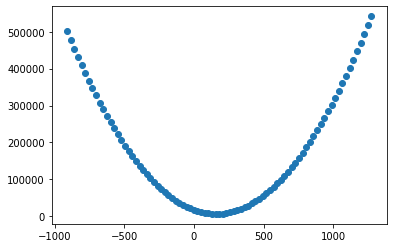

In [28]:
w_ = np.arange(-70, 100, 2)
y_pred_, f_ = [], []
for i in w_:
    y_pred_.append(1/X.shape[0] * np.sum(i * X[1]))
    f_.append(1/X.shape[0] * np.sum((i * X[1] - y)**2))
print(len(y_pred_))
print(len(f_))
plt.scatter(y_pred_, f_)